In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_loan.csv')

In [3]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
categorical_columns = [col for col in df.columns if df[col].dtype =='O']
categorical_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Handling Missing Values

In [7]:
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [9]:
df['Dependents'].replace({'3+':'3'}, inplace=True)

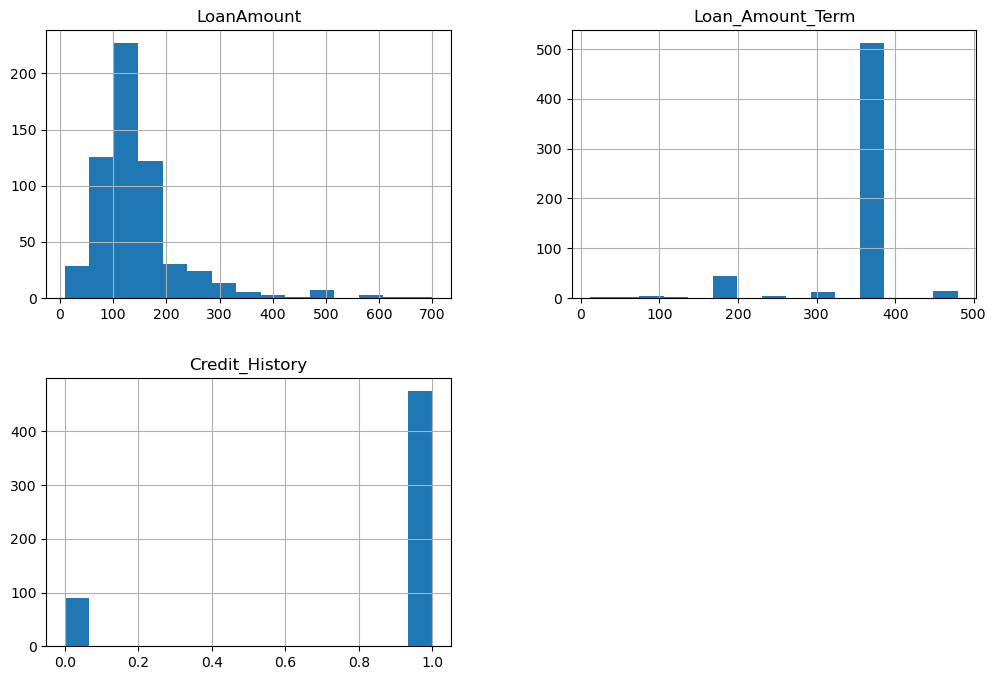

In [10]:
df[['LoanAmount', 'Loan_Amount_Term','Credit_History']].hist(figsize=(12,8), bins=15)
plt.show()

In [11]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df.drop(['Loan_ID'], axis=1, inplace=True)

Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns.remove('Loan_ID')
for col in categorical_columns:
    df[col]= le.fit_transform(df[col])


In [15]:
x= df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.6829268292682927


Ensemble

Bagging

In [18]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimator=tree, n_estimators=100, random_state=42)
bagging_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [19]:
y_pred_bg = bagging_clf.predict(x_test)
print('accuracy_score', accuracy_score(y_test, y_pred_bg))

accuracy_score 0.7398373983739838


Bagging with Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
#without bagging

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [22]:
y_pred_log_reg = log_reg.predict(x_test)
accuracy_score(y_test, y_pred_log_reg)

0.7886178861788617

In [23]:
#with Bagging

tree = LogisticRegression(max_iter=500)
log_bagging = BaggingClassifier(estimator=tree,n_estimators=100,random_state=42)
log_bagging.fit(x_train, y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=500), n_estimators=100,
                  random_state=42)

In [24]:
y_pred_bg_log = log_bagging.predict(x_test)
accuracy_score(y_test, y_pred_bg_log)

0.7886178861788617

Bagging with Svm

In [25]:
from sklearn.svm import SVC

tree = SVC()
bagging_svc = BaggingClassifier(estimator=tree, n_estimators=100, random_state=42)
bagging_svc.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=42)

In [26]:
y_pred_svm = bagging_svc.predict(x_test)
accuracy_score(y_test, y_pred_svm)

0.6504065040650406

Boosting

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [28]:
y_pred_ada = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred_ada)

0.7560975609756098

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [30]:
y_pred_gb = gb_clf.predict(x_test)
accuracy_score(y_test, y_pred_gb)

0.7398373983739838

In [31]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred_xgb = xgb_clf.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

0.7398373983739838